# ch01.10 이미지넷 모델구현 - ResNet
---

* 날짜:
* 이름:

## 학습내용
    - ResNet 모델 특징에 대해 이해한다.
    - ResNet 모델을 텐서플로우를 이용해 구현한다. 


## 소개
---

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as 

## 구현
---

In [34]:
def identity_block(x, filter_size, idx):
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter_size, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter_size, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [35]:
def convolutional_block(x, filter_size,idx):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter_size, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)

    # Layer 2
    x = tf.keras.layers.Conv2D(filter_size, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(filter_size, (1,1), strides = (2,2))(x_skip)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x


In [36]:
def ResNet34(shape = (32, 32, 3), classes = 10):
    x_input = tf.keras.layers.Input(shape, name="Input")
    x = tf.keras.layers.ZeroPadding2D((3, 3), name="Input_shape")(x_input)
    
    y = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same', activation="relu")(x)
    y = tf.keras.layers.BatchNormalization()(y)
    y = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(y)
    #################################################

    block_layers = [3, 4, 6, 3] # 블럭당 레이어 개수 지정
    filter_size = 64 # 첫번째 필터 사이즈
    
    for idx in range(4):
        if idx == 0: # 첫번째 블럭에는 Residual / Convolutional Block 이 필요없음
            for j in range(block_layers[idx]):
                y = identity_block(y, filter_size, idx)
        else: # 두번째 블럭부터 가장 앞에 Residual / Convolutional Block 이 따라옴
            filter_size = filter_size*2 # 필터 사이즈가 블럭 한번을 거칠때 마다 2배씩 증가함
            y = convolutional_block(y, filter_size, idx)
            for j in range(block_layers[idx] - 1):
                y = identity_block(y, filter_size, idx)
                
    ################################################
    y = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(y)
    y = tf.keras.layers.Flatten()(y)
    y = tf.keras.layers.Dense(512, activation = 'relu')(y)
    y = tf.keras.layers.Dense(classes, activation = 'softmax')(y)
    model = tf.keras.models.Model(inputs = x_input, outputs = y, name = "ResNet34")
    return model

In [37]:
model = ResNet34()

In [38]:
model.summary()

Model: "ResNet34"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
Input_shape (ZeroPadding2D)     (None, 38, 38, 3)    0           Input[0][0]                      
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 19, 19, 64)   9472        Input_shape[0][0]                
__________________________________________________________________________________________________
batch_normalization_155 (BatchN (None, 19, 19, 64)   256         conv2d_46[0][0]                  
___________________________________________________________________________________________

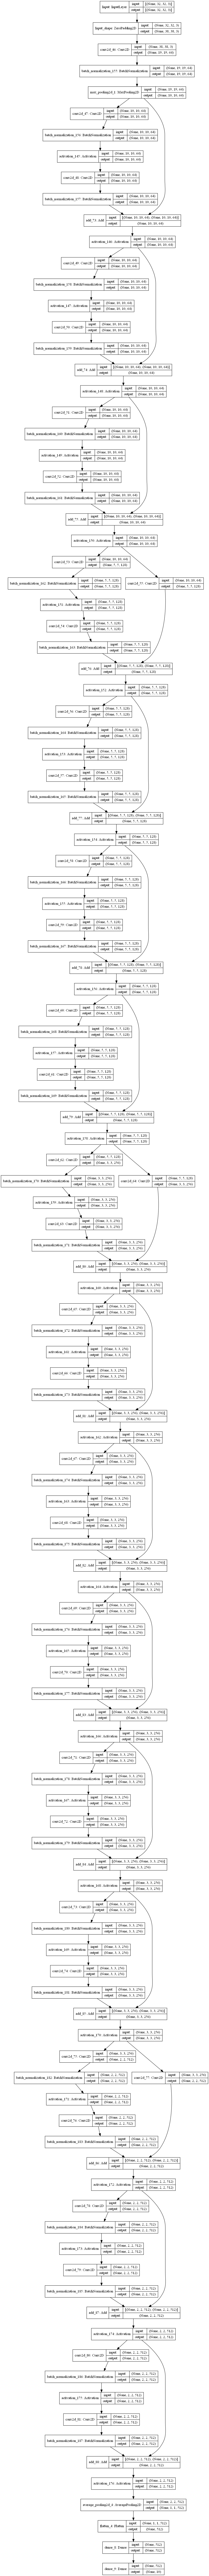

In [40]:
tf.keras.utils.plot_model(model, show_shapes=True)